In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torchsummary import summary
from torch.optim import Adam

In [2]:
SEED = 1
torch.manual_seed(SEED)

In [3]:
data = pd.read_csv('tumors.csv')
data.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


In [4]:
data['tumor_class'].value_counts()

malignant    611
benign       389
Name: tumor_class, dtype: int64

In [5]:
X = data[['leukocyte_count', 'blood_pressure']].values
y = data['tumor_class'].values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

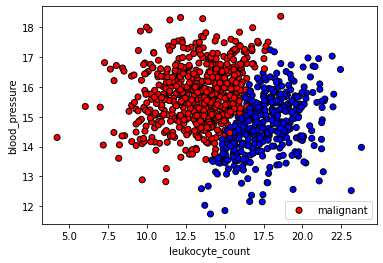

In [6]:
colors = {'benign' : 'blue', 'malignant' : 'red'}
plt.scatter(data['leukocyte_count'], data['blood_pressure'], c = [colors[y] for y in y], edgecolors = 'k')
plt.xlabel('leukocyte_count')
plt.ylabel('blood_pressure')
plt.legend(['malignant', 'benign'], loc = 'lower right')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

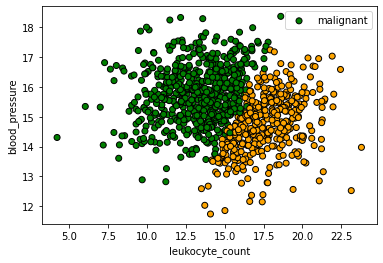

In [8]:
colors = {'benign' : 'orange', 'malignant' : 'green'}
plt.scatter(data['leukocyte_count'], data['blood_pressure'], c = [colors[item] for item in y], edgecolors = 'k')
plt.xlabel('leukocyte_count')
plt.ylabel('blood_pressure')
plt.legend(['malignant', 'benign'], loc = 'upper right')
plt.show()

# Split data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
def split(X, y, val_size, test_size, shuffle):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y, shuffle = shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, stratify = y_train, shuffle = shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [12]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
SHUFFLE = True

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = split(X, y, VAL_SIZE, TEST_SIZE, SHUFFLE)

In [14]:
print(f'Number of data points is sets :\n')
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'X_val : {X_val.shape}, y_val : {y_val.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

Number of data points is sets :

X_train : (722, 2), y_train : (722,)
X_val : (128, 2), y_val : (128,)
X_test : (150, 2), y_test : (150,)


In [15]:
print(f'Sample point : {X_train[0]} --> {y_train[0]}')

Sample point : [15.53101895 15.44218229] --> malignant


In [18]:
import collections
# There are two ways to get the distribution of labels
# 1]
print(data['tumor_class'].value_counts(),'\n')
# 2
class_counts = dict(collections.Counter(y))
print(f'Classes : {class_counts}')

malignant    611
benign       389
Name: tumor_class, dtype: int64 

Classes : {'malignant': 611, 'benign': 389}


In [19]:
# Before this we only worked with numerical data but now we have labels which are in text.
# So, we will need to convert this to numeric form.
# For converting labels to numeric form there is one method called 'LabelEncoder' in sklearn, we will apply that.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
# fitting on train data
y_le = le.fit(y_train)
classes = y_le.classes_

In [21]:
# Convert labels to tokens
# Before transforming
print(f'y_train[0] : {y_train[0]}')
y_train = y_le.transform(y_train)
y_val = y_le.transform(y_val)
y_test = y_le.transform(y_test)
print(f'y_train[0] : {y_train[0]}')

y_train[0] : malignant
y_train[0] : 1


In [22]:
classes1 = collections.Counter(y_train)
class_weights = {_class : 1.0/count for _class, count in classes1.items()}
print (f"class counts: {classes1},\nclass weights: {class_weights}")

class counts: Counter({1: 441, 0: 281}),
class weights: {1: 0.0022675736961451248, 0: 0.0035587188612099642}


# Standardize the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler().fit(X_train)

In [25]:
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [26]:
# Check (means should be ~0 and std should be ~1)
print (f"X_train[0]: mean: {np.mean(X_train[:, 0], axis=0):.1f}, std: {np.std(X_train[:, 0], axis=0):.1f}")
print (f"X_train[1]: mean: {np.mean(X_train[:, 1], axis=0):.1f}, std: {np.std(X_train[:, 1], axis=0):.1f}")
print (f"X_val[0]: mean: {np.mean(X_val[:, 0], axis=0):.1f}, std: {np.std(X_val[:, 0], axis=0):.1f}")
print (f"X_val[1]: mean: {np.mean(X_val[:, 1], axis=0):.1f}, std: {np.std(X_val[:, 1], axis=0):.1f}")
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")

X_train[0]: mean: 0.0, std: 1.0
X_train[1]: mean: -0.0, std: 1.0
X_val[0]: mean: -0.0, std: 1.1
X_val[1]: mean: 0.1, std: 1.0
X_test[0]: mean: -0.0, std: 0.9
X_test[1]: mean: 0.0, std: 1.0


In [27]:
import torch.nn.functional as F

In [28]:
from torch import nn
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_classes)
        
    def forward(self, x_in, apply_softmax = False):
        y_pred = self.fc1(x_in)
        if apply_softmax:
            y_pred = F.softmax(y_pred, dim = 1)
        return y_pred

In [29]:
INPUT_DIM = X_train.shape[1]
NUM_CLASSES = len(classes)

In [30]:
model = LogisticRegression(input_dim = INPUT_DIM, num_classes = NUM_CLASSES)
print(model.named_parameters)
summary(model, input_size=(INPUT_DIM,))

<bound method Module.named_parameters of LogisticRegression(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
)>
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            6
Total params: 6
Trainable params: 6
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            6
Total params: 6
Trainable params: 6
Non-trainable params: 0

# Loss

In [31]:
loss_fn = nn.CrossEntropyLoss()

In [32]:
# In our case, we will also incorporate the class weights into our loss function to counter any class imbalances.
weights = torch.Tensor([class_weights[key] for key in sorted(class_weights.keys())])
loss_fn = nn.CrossEntropyLoss(weight=weights)

# Metrics

In [33]:
def accuracy_fn(y_pred, y_true):
    n_correct = torch.eq(y_pred, y_true).sum().item()
    accuracy = (n_correct / len(y_pred)) * 100
    return accuracy

# Optimizers

In [34]:
learning_rate = 1e-1
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Training

In [35]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [36]:
EPOCHS = 100
for epoch in range(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%10==0: 
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 0.53, accuracy: 71.6
Epoch: 10 | loss: 0.20, accuracy: 90.7
Epoch: 20 | loss: 0.12, accuracy: 97.5
Epoch: 30 | loss: 0.10, accuracy: 98.1
Epoch: 40 | loss: 0.08, accuracy: 98.2
Epoch: 50 | loss: 0.08, accuracy: 98.3
Epoch: 60 | loss: 0.07, accuracy: 98.5
Epoch: 70 | loss: 0.07, accuracy: 98.6
Epoch: 80 | loss: 0.06, accuracy: 98.6
Epoch: 90 | loss: 0.06, accuracy: 98.6


# Evaluation

In [37]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = plt.cm.Spectral
    
    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    y_pred = model(X_test, apply_softmax=True)
    _, y_pred = y_pred.max(dim=1)
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [39]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """Plot a confusion matrix using ground truth and predictions."""
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #  Figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Axis
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    ax.set_xticklabels([''] + classes)
    ax.set_yticklabels([''] + classes)
    ax.xaxis.set_label_position('bottom') 
    ax.xaxis.tick_bottom()

    # Values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:d} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Display
    plt.show()

In [40]:
# Predictions
pred_train = model(X_train, apply_softmax=True)
pred_test = model(X_test, apply_softmax=True)
print (f"sample probability: {pred_test[0]}")
pred_train = pred_train.max(dim=1)[1]
pred_test = pred_test.max(dim=1)[1]
print (f"sample class: {pred_test[0]}")

sample probability: tensor([8.4218e-06, 9.9999e-01], grad_fn=<SelectBackward>)
sample class: 1


In [41]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.99, test acc: 0.99


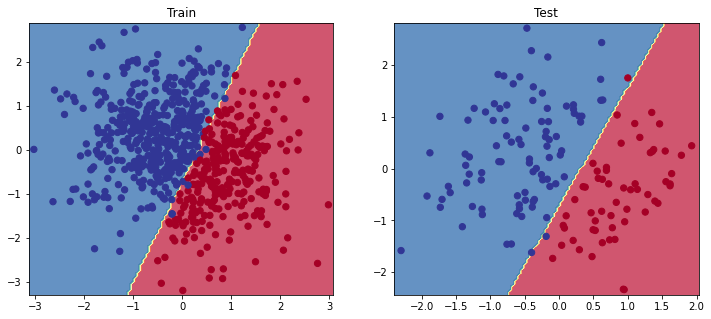

In [42]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()

<ipython-input-39-c4b3e1cd4909>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes)
<ipython-input-39-c4b3e1cd4909>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes)


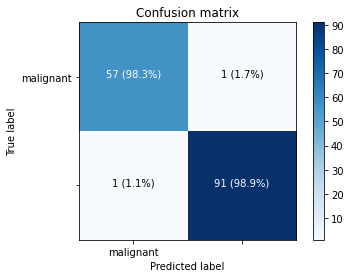

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.99      0.99      0.99        92

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [43]:
# Classification report
plot_confusion_matrix(y_true=y_test, y_pred=pred_test, classes=classes)
print (classification_report(y_test, pred_test))

# Inference

In [44]:
# Inputs for inference
X_infer = pd.DataFrame([{'leukocyte_count': 13, 'blood_pressure': 16}])
X_infer.head()

,leukocyte_count,blood_pressure
0,13,16


In [45]:
# Standardize
X_infer = ss.transform(X_infer)
print (X_infer)

[[-0.66469042  0.61150123]]


In [46]:
# Predict
y_infer = model(torch.Tensor(X_infer), apply_softmax=True)
prob, _class = y_infer.max(dim=1)
print (f"The probability that you have a {classes[_class.detach().numpy()[0]]} tumor is {prob.detach().numpy()[0]*100.0:.0f}%")

The probability that you have a malignant tumor is 100%


In [47]:
print (f"You have {classes[_class.detach().numpy()[0]]} tumor with {prob.detach().numpy()[0]*100.0:.0f}% of probability")

You have malignant tumor with 100% of probability
